# Group Exam for INFO284






# **Introduction**

In this project, we tackled two main tasks: Sentiment Analysis and Convolutional Neural Networks. These tasks show how machine learning can be used for text and image analysis, and let us apply what we learned in the INFO284 course.
For both tasks, we followed these steps: exploring the data, cleaning and preparing it, building different models, and testing how well they work. We explain why we made certain choices at each step and what we learned from the results.
The next sections show our work on each task, from understanding the data to evaluating our final models.

Jupyter Notebook magic command that autosaves the notebook every 5 seconds.

In [ ]:
%autosave 5

Autosaving every 5 seconds


Checks the total amount of words in all markdown cells

In [ ]:
from google.colab import _message
import re

def get_markdown_word_count():
    # Get the notebook content
    response = _message.blocking_request('get_ipynb')
    notebook = response['ipynb']
    cells = notebook['cells']

    word_count = 0

    for cell in cells:
        if cell['cell_type'] == 'markdown':
            source = ''.join(cell['source'])
            # Strip common markdown syntax
            source = re.sub(r'\[(.*?)\]\(.*?\)', r'\1', source)  # Links
            source = re.sub(r'!\[.*?\]\(.*?\)', '', source)      # Images
            source = re.sub(r'[`*>#\-\n]', ' ', source)          # Markdown symbols
            words = re.findall(r'\b\w+\b', source)
            word_count += len(words)

    print(f"Total words in Markdown cells: {word_count}")

get_markdown_word_count()

Total words in Markdown cells: 2250


This code cell downloads the CSV file we use in task 1 and image file in task 2 from Google Drive to the local file system of the Google Colab environment. Since Google Colab sessions are temporary and any files stored locally will disappear once the session ends or times out, this code ensures that the file is downloaded only if it does not already exist in the current session. This approach helps manage the large file size of the dataset efficiently, avoiding redundant downloads and saving time and bandwidth. Additionally due to it being so large we decided to sample 100000 rows instead of the full 500000 for faster load times




In [ ]:
import os
import pandas as pd

file_path = "/content/Hotel_Reviews.csv"
file_path2 = "/content/new_cat.jpg"
# Check if file already exists before downloading
if not os.path.exists(file_path):
    print("Downloading file...")
    !gdown --id 1LhE0yNkjDkLjGmTDx5Iq2_FD19dtiW37 -O Hotel_Reviews.csv
else:
    print("File already exists, skipping download.")


# Check if cat image already exists before downloading
if not os.path.exists(file_path2):
    print("Downloading cat image...")
    !gdown --id 1LD7FaDd4HZhUZCG7BWkVpiiIL1Dva_Z1 -O new_cat.jpg
else:
    print("Cat image already exists, skipping download.")


# Selects 100000 rows instead of all the 500000 rows to speed
# up the models. 100000 rows is enough data
df = pd.read_csv('/content/Hotel_Reviews.csv', nrows=100000)



# Remove duplicate rows
print("Duplicated rows before: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicated rows after: ", df.duplicated().sum())


# Finds average score
a_score = df['Reviewer_Score'].mean()
print("Average: ")
print(a_score)


df.head(10)  # Display the first few rows to verify

df.info()  # Get information about the DataFrame

df.describe()  # Get summary statistics of numerical columns


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1LhE0yNkjDkLjGmTDx5Iq2_FD19dtiW37
From (redirected): https://drive.google.com/uc?id=1LhE0yNkjDkLjGmTDx5Iq2_FD19dtiW37&confirm=t&uuid=7ffb00b5-30f7-4f5f-a066-e33685bdc3ae
To: /content/Hotel_Reviews.csv
100% 238M/238M [00:01<00:00, 122MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1LD7FaDd4HZhUZCG7BWkVpiiIL1Dva_Z1
To: /content/new_cat.jpg
100% 33.4k/33.4k [00:00<00:00, 65.5MB/s]
Duplicated rows before:  34
Duplicated rows after:  0
Average: 
8.378969849748914
<class 'pandas.core.fr

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,99966.000000,99966.000000,99966.000000,99966.000000,99966.000000,99966.000000,99966.000000,99929.000000,99929.000000
mean,593.743963,8.390082,18.578017,2500.724996,17.311896,6.577416,8.378970,50.986012,0.376489
std,604.218491,0.594158,29.339856,2117.931051,20.930530,10.270339,1.664034,1.060941,1.026313
min,5.000000,6.800000,0.000000,45.000000,0.000000,1.000000,2.500000,48.817808,-0.319292
25%,196.000000,8.000000,2.000000,1016.000000,5.000000,1.000000,7.500000,51.491888,-0.170307
50%,421.000000,8.400000,9.000000,2007.000000,11.000000,3.000000,8.800000,51.502702,-0.125160
75%,728.000000,8.900000,24.000000,2903.000000,22.000000,8.000000,9.600000,51.515052,-0.023221
max,2682.000000,9.800000,401.000000,9086.000000,383.000000,315.000000,10.000000,52.360576,4.915968


To ensure that all the necessary libraries are available to run this notebook, we have generated a `requirements.txt` file. This file lists all the libraries and their respective versions that are required for this project, as well as the libraries that come with the standard Google Colab environment. As a result, many libraries in the file may be redundant and not in use.

However, to highlight the most important libraries that provide the core functionality for this project, they are:

- **pandas**: Essential for data manipulation and analysis. It provides powerful data structures like DataFrames, which are crucial for handling and processing structured data.
- **scikit-learn (sklearn)**: A comprehensive machine learning library that offers tools for model selection, training, evaluation, and various machine learning algorithms.
- **NumPy**: Fundamental for numerical computing. It provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
- **TensorFlow**: An open-source deep learning framework developed by Google. It is widely used for building and training neural networks and other complex machine learning models.
- **matplotlib**: A plotting library used for creating static, animated, and interactive visualizations in Python. It is essential for data visualization, allowing us to create various types of plots and charts to better understand our data.

- **Seaborn**: A statistical data visualization library built on matplotlib. It provides elegant, informative graphics and simplified interfaces for creating complex statistical visualizations with minimal code.


These libraries are integral to the various stages of data processing, model building, and evaluation in our project.

We used the following command in our Google Colab environment to generate the `requirements.txt` file:


In [ ]:
#Command that creates the txt file with all the installed libraries
!pip freeze > requirements.txt


# **Task 1:**










**Task I: Sentiment Analysis**

For the first task, we performed necessary preprocessing and used different models on the Hotel_Reviews.csv file.

Exploratory Data Analysis and Preprocessing:

In order to gain a sufficient understanding of the data for developing the models and perform data cleaning as well as feature engineering, we analyzed the feature columns to identify which data is most relevant and will have an effect on our label column, `Reviewer_Score` . The goal was to derive meaningful insights and determine which features significantly impacted our sentiment label and which were redundant.

Finding out which features to remove was quite a straightforward process. We had to look at which ones were redundant or less relevant to our analysis. Specifically, we focused on identifying columns that did not provide additional value or that had better alternatives. For instance, we decided to remove the `Review_Date` column because the dataset already includes a more convenient and directly usable column, `days_since_review`.

The `days_since_review` column contains numerical values representing the number of days since the review was written, such as "10 days". This numerical format is easier to convert and more suitable for our models to use. By using days_since_review, we avoid the additional preprocessing steps required to convert `Review_Date` into a numerical format. This simplifies our data preparation process and ensures consistency and accuracy in our models. The same principle applies to the other columns we chose to remove, such as `Hotel_Address`, as we identified better alternatives. Further details can be found later in the project."







Columns that can be removed and why:
- Review_Date: "Redundant info with days_since_review"
- Hotel_Address: "Redundant info with Hotel_Name, lat and lng"
- Negative_Review: "Review_Total_Negative_Word_Counts shows almost the same data in a numerical way"
- Positive_Review: "Review_Total_Positive_Word_Counts shows almost the same data in a numerical way"



This code cell removes the columns which we found redundant from our dataset and additionally removes any missing values by applying the "dropna" method. Then prints a list of the ones that are left after removal.

In [ ]:
df = df.drop(columns=['Review_Date', 'Hotel_Address', 'Negative_Review', 'Positive_Review', 'Tags', 'lat', 'lng'], errors='ignore').dropna() #Removes columns and missing values

print(df.columns.tolist()) #Print to check which columns are left

['Additional_Number_of_Scoring', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'days_since_review']


After removing the unnecessary columns, we use the `LabelEncoder` from the `sklearn.preprocessing` module to convert categorical data into numerical format. This step is essential because the machine learning models we are going to use require numerical input to operate correctly.

A copy of the original dataframe is created and named `df_new`. An empty dictionary, `label_encoders_new`, is initialized to store the `LabelEncoder` instances for each categorical column listed in `categorical_columns_new`. We then iterate through each column in the `categorical_columns_new` list. For each column, a new `LabelEncoder` instance is created. The `fit_transform` method is used to fit the encoder to the values in each column and transform them into numeric labels. Each `LabelEncoder` instance is stored in the `label_encoders_new` dictionary for potential future use, such as inverse transformation.

To prepare the data for binary sentiment classification, we create a new column called `sentiment_label`, which classifies a review as positive (1) if the `Reviewer_Score` is greater than 8.0, and negative (0) otherwise. This threshold of 8.0 was selected based on the average score in the dataset, serving as a reasonable dividing line between satisfied and less satisfied reviews.

Next, we define the feature set `X` by dropping the `sentiment_label` and `Reviewer_Score` columns from `df_new`, and use the `StandardScaler` to standardize the feature values. This normalization ensures that all features contribute equally to the model training process, especially those with different units or scales. The target variable is stored in `y`, and we use the `train_test_split` function to divide the dataset into training and test sets.

Finally, the first ten rows of the transformed dataframe are displayed using the `head` method to verify that the encoding and preprocessing have been applied correctly.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

df_new = pd.DataFrame(df)

# Dictionary to store LabelEncoders
label_encoders_new = {}

# List of categorical columns
categorical_columns_new = ['Hotel_Name', 'Reviewer_Nationality', 'days_since_review']

# Encoding each categorical column
for col in categorical_columns_new:
    le = LabelEncoder()  # Create a new LabelEncoder instance
    df_new[col] = le.fit_transform(df_new[col])  # Apply Label Encoding
    label_encoders_new[col] = le  # Store the encoder for future use

# Create binary sentiment label: 1 if score > 8.0, else 0
df_new['sentiment_label'] = (df_new['Reviewer_Score'] > 8.0).astype(int)

#Prepares data to be used in all four models
X = df_new.drop(['sentiment_label', 'Reviewer_Score'], axis=1)
y = df_new['sentiment_label']

# Display the transformed DataFrame
df_new.head(10)


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **LSTM**

The LSTM Model:

After having preprocessed data, we implemented an LSTM model for our sentiment analysis task. LSTMs are particularly well-suited for text classification problems like sentiment analysis because they can capture contextual information and long-range dependencies in text sequences.

Two of the most important hyperparameters for LSTM is network size and learning rate. The network size includes both LSTM units and dense layer dimensions. We chose 128 LSTM units and 64 dense units to balance model complexity and performance. This configuration provides enough capacity to learn patterns without overfitting.
As for the learning rate, we use the default Adam optimizer setting (0.001). The learning rate controls how quickly our model updates its weights during training. This parameter determines the size of steps taken when adjusting weights in response to prediction errors


In [ ]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np



# Convert to numpy arrays
X_train_array = X_train.values
X_test_array = X_test.values

# Reshape for LSTM (samples, time steps, features)
# Using all features as a single time step
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], 1, X_train_array.shape[1])
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], 1, X_test_array.shape[1])

# Build LSTM Model without Embedding layer
model = Sequential([
    LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=(1, X_train.shape[1])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_reshaped, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
test_loss, accuracy_lstm = model.evaluate(X_test_reshaped, y_test)
print(f"\nTest Accuracy: {accuracy_lstm:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6280 - loss: 0.6576 - val_accuracy: 0.6564 - val_loss: 0.6313
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.6796 - loss: 0.6036 - val_accuracy: 0.7315 - val_loss: 0.5433
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6993 - loss: 0.5816 - val_accuracy: 0.7357 - val_loss: 0.5516
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6843 - loss: 0.5878 - val_accuracy: 0.7477 - val_loss: 0.5349
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6973 - loss: 0.5802 - val_accuracy: 0.7464 - val_loss: 0.5437
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7044 - loss: 0.5745 - val_accuracy: 0.7234 - val_loss: 0.5678
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7058 - loss: 0.5734 - val_accuracy: 0.7422 - val_loss: 0.5360
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7457 - loss: 0.5352

Test Accuracy: 0.7

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


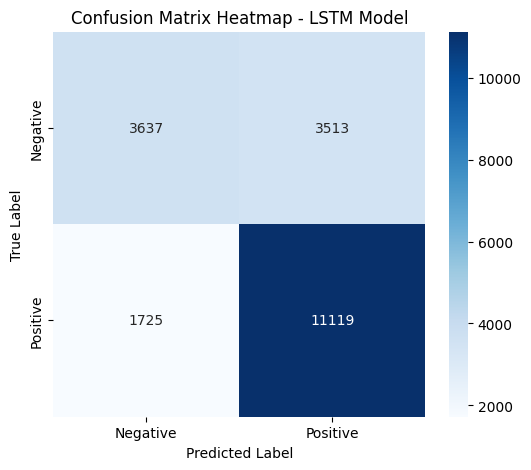

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
y_pred_lstm = (model.predict(X_test_reshaped) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred_lstm)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - LSTM Model")
plt.show()

# For comparison:
# Turn classification report into a dictionary so we can extract values
report_lstm = classification_report(y_test, y_pred_lstm, output_dict=True)

# Extract weighted average F1 score
f1_lstm_weighted = report_lstm['weighted avg']['f1-score']


# **KNN**

We decided to use K-Nearest Neighbors algoritm for the next model, which is a supervised learning method often used for classification and different regression tasks. It is a distance-based algorithm that predicts the label of new data points by looking at the labels of its closest neighbors.

StandardScaler is an important step for KNN, which standardizes the features in the dataset by removing the mean and scaling to unit variances. This ensures that each feature has zero mean and unit variance, which is an important step for knn, and will make the machines perform better. How it works, is for each feature x, it transforms the values using the Z-score Normalization formula.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the 'k' value
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Test Accuracy: {accuracy_knn:.4f}")
print(classification_report(y_test, y_pred_knn))

# For comparison:
# Turn classification report into a dictionary so we can extract values
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Extract weighted average F1 score
f1_knn_weighted = report_knn['weighted avg']['f1-score']

Test Accuracy: 0.7427
              precision    recall  f1-score   support

           0       0.66      0.57      0.61      7150
           1       0.78      0.84      0.81     12844

    accuracy                           0.74     19994
   macro avg       0.72      0.70      0.71     19994
weighted avg       0.74      0.74      0.74     19994



Overfit check:

In [ ]:
# Predictions on training set
y_train_pred = knn.predict(X_train_scaled)

# Compute accuracy for both train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.8208
Test Accuracy: 0.7427


# **Logistic Regression**

Logistic Regression is a linear model commonly used for binary classification. It is simple, efficient, and serves as a strong baseline for comparison against more complex models. Before training, we standardized the input features using StandardScaler to ensure that all variables contribute equally to the model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Evaluate Logistic Regression
y_pred_lr = logreg.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Test Accuracy: {:.4f}".format(accuracy_lr))
print(classification_report(y_test, y_pred_lr))

# For comparison:
# Turn classification report into a dictionary so we can extract values
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

# Extract weighted average F1 score
f1_lr_weighted = report_lr['weighted avg']['f1-score']



Logistic Regression Test Accuracy: 0.7661
              precision    recall  f1-score   support

           0       0.73      0.55      0.63      7150
           1       0.78      0.88      0.83     12844

    accuracy                           0.77     19994
   macro avg       0.75      0.72      0.73     19994
weighted avg       0.76      0.77      0.76     19994



The model achieved a test accuracy of 0.77 and a weighted F1-score of 0.76, performing well overall. It showed stronger performance on the positive class, while performance on the negative class was lower in recall. This may be due to class imbalance or overlapping feature values.

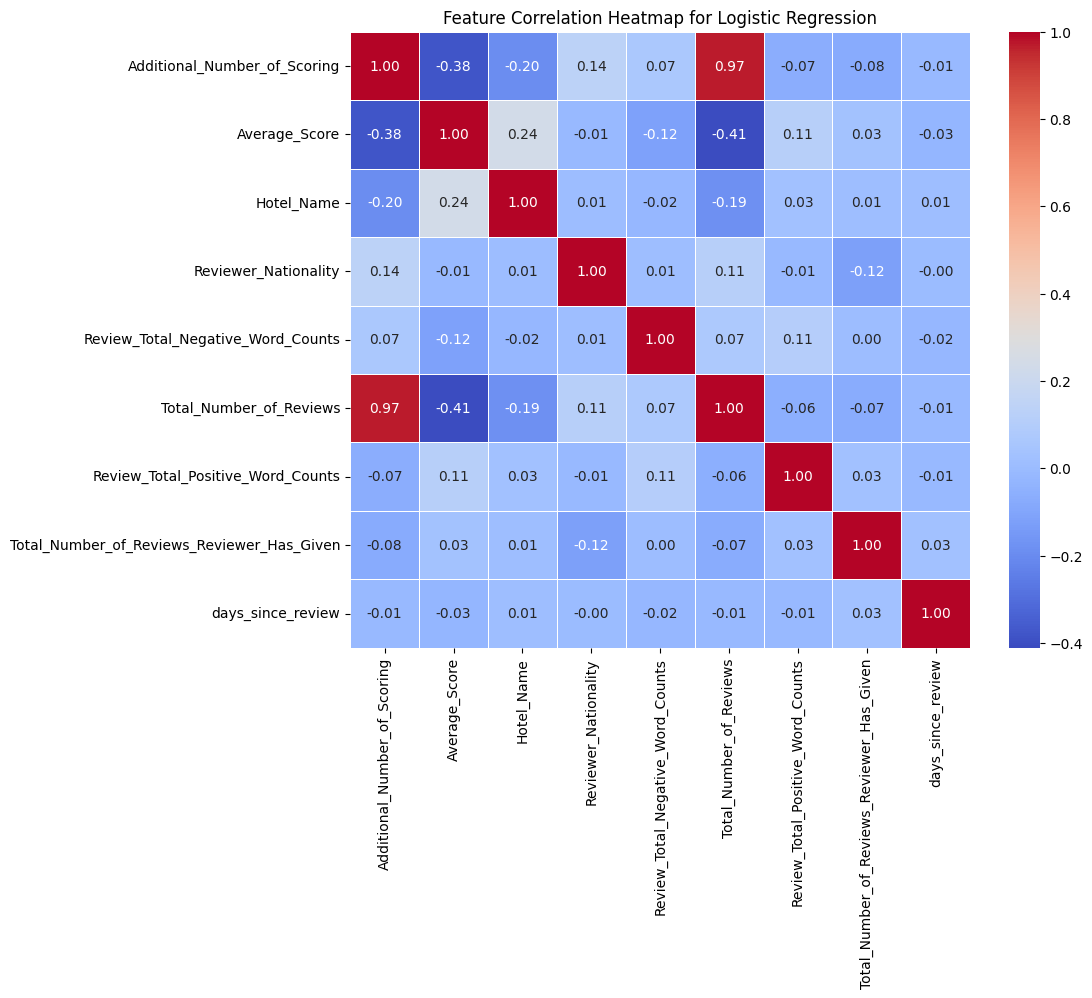

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute the correlation matrix
corr_matrix = df_new.drop(['sentiment_label', 'Reviewer_Score'], axis=1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap for Logistic Regression")
plt.show()

The correlation heatmap helps visualize relationships between input features. Strong correlations between 'Additional_Number_of_Scoring' and 'Total_Number_of_Reviews', suggest multicollinearity, which could be fixed in future versions of the model through feature selection or dimensionality reduction.

# **Random Forest**

Random Forest is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to improve stability and reduce overfitting. It is robust against noise and can model complex feature interactions without requiring feature scaling. However, for consistency across all models in this project, we applied standardization to the input features before training.

For our Random Forest implementation, we used two explicitly defined hyperparameters:


n_estimators=100: This controls the number of decision trees in the forest. Higher values typically improve performance by reducing variance but increase computational cost. 100 trees provides a good balance between accuracy and efficiency.


random_state=42: This ensures reproducibility of results by fixing the random seed.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
X = df_new.drop(['sentiment_label', 'Reviewer_Score'], axis=1)
y = df_new['sentiment_label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Standardize features (not strictly necessary for Random Forest, but can help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)



Random Forest Test Accuracy: 0.7719
              precision    recall  f1-score   support

           0       0.70      0.63      0.66      7150
           1       0.80      0.85      0.83     12844

    accuracy                           0.77     19994
   macro avg       0.75      0.74      0.75     19994
weighted avg       0.77      0.77      0.77     19994



The Random Forest model achieved a test accuracy of approximately 77%, with a weighted F1-score of 0.77. The model showed stronger performance on positive reviews (1), with higher precision and recall, while performance on negative reviews (0) was noticeably lower. This imbalance could partly be explained by the data distribution: the dataset contains significantly more positive reviews than negative ones, making it easier for the model to predict the majority class.



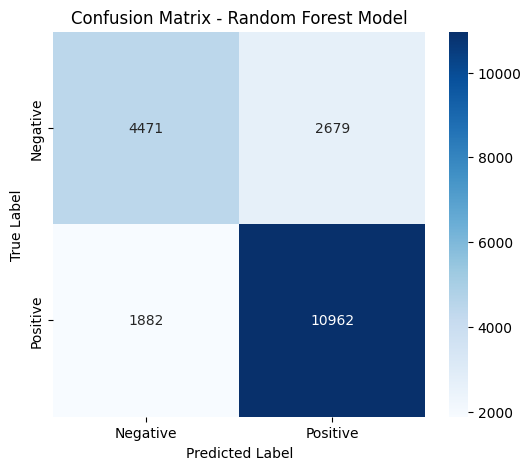

In [ ]:
# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()

# For comparison:
# Turn classification report into a dictionary so we can extract values
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Extract weighted average F1 score
f1_rf_weighted = report_rf['weighted avg']['f1-score']

The confusion matrix further illustrates the model’s tendency to predict positive reviews more accurately than negative ones. Despite this, overall misclassification rates remain relatively low. Addressing the class imbalance through resampling techniques or adjusting class weights could further improve model performance, particularly for the minority (negative) class.

# Summary of model-results

We trained and evaluated four models for sentiment analysis: Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), and an LSTM neural network. The table below summarizes their performance based on accuracy and weighted average F1 score:

In [ ]:
# Example model comparison summary (replace with your actual values)
import pandas as pd

results = {
    "Model": ["Logistic Regression", "Random Forest", "KNN", "LSTM"],
    "Accuracy": [accuracy_lr, accuracy_rf, accuracy_knn, accuracy_lstm],
    "F1 Score - Weighted avg.": [f1_lr_weighted, f1_rf_weighted, f1_knn_weighted, f1_lstm_weighted]
}

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,F1 Score - Weighted avg.
0,Logistic Regression,0.766130,0.757650
1,Random Forest,0.771882,0.768582
2,KNN,0.742673,0.737687
3,LSTM,0.738021,0.727827


Among the models, Random Forest performed the best overall, achieving the highest accuracy (77.19%) and the highest weighted F1 score (76.86%). Logistic Regression also showed solid performance with slightly lower metrics. The LSTM and KNN models performed similarly but slightly below the tree-based models. This result suggests that traditional machine learning models like Random Forest can be highly effective for text-based sentiment classification, especially with well-engineered features.



Despite LSTM being a neural model designed for sequence data, it did not outperform simpler models in this case, possibly due to limited training data, model complexity, or the effectiveness of the feature engineering applied to traditional models. For practical applications in hotel review sentiment analysis, our findings suggest implementing the computationally efficient Random Forest model would provide optimal results while requiring fewer resources than deep learning approaches.






# **Task 2:**

# CNN:

We use a custom Convolutional Neural Network (CNN) model to train on the CIFAR-10 dataset. This approach allows us to build a lightweight yet effective architecture tailored to the binary classification task of identifying whether an image contains a cat or not. The CIFAR-10 dataset consists of 10 classes, with only 1/10 of the images belonging to the "cat" class. This imbalance can lead to biased predictions favoring the majority class ("not-cat"). To address this, we introduced class weights during training, assigning higher importance to the minority class ("cat") to ensure the model learns to correctly identify cat images.

Additionally, we increased the number of training epochs from 5 to 10 to allow the model to learn more effectively from the data. This adjustment helps the model achieve better performance by giving it more time to optimize its parameters and reduce both training and validation loss.

The model is trained using the binary cross-entropy loss function, with a sigmoid activation function in the output layer to produce probabilities for the "cat" class. If the prediction probability exceeds 50%, the model classifies the image as a "cat." This setup ensures that the model is well-suited for the binary classification task and can handle the inherent imbalance in the dataset effectively.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.utils.class_weight import compute_class_weight

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Define CIFAR-10 class names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Binary classification for "Cat"
chosen_class = 3

# Convert labels to binary classification (cat=1, not-cat=0)
y_train_binary = (y_train.reshape(-1) == chosen_class).astype(np.float32)
y_test_binary = (y_test.reshape(-1) == chosen_class).astype(np.float32)

# Normalize images (scale pixel values to [0, 1])
x_train = x_train / 255.0
x_test = x_test / 255.0

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_binary),
    y=y_train_binary
)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
model.fit(
    x_train, y_train_binary,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test_binary),
    class_weight=class_weights_dict  # Add class weights here
)

# Load and preprocess the test image
img_path = "new_cat.jpg"
new_img = cv2.imread(img_path)  # Read the image
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
new_img = cv2.resize(new_img, (32, 32))  # Resize to 32x32
new_img = new_img / 255.0  # Normalize pixel values to [0, 1]
new_img = np.expand_dims(new_img, axis=0)  # Add batch dimension

# Make a prediction
prediction = model.predict(new_img)[0][0]

threshold = 0.5
classification = (prediction > threshold).astype(int)

if prediction > threshold:
    print("This image is classified as a Cat.")
    print(f"Classification score: {classification} (0=Not Cat, 1=Cat)")
else:
    print("This image is NOT classified as a Cat.")
    print(f"Classification score: {classification} (0=Not Cat, 1=Cat)")
print(f"Prediction score: {prediction}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 81ms/step - accuracy: 0.6472 - loss: 0.6124 - val_accuracy: 0.7005 - val_loss: 0.5326
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.7053 - loss: 0.5038 - val_accuracy: 0.7472 - val_loss: 0.4659
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 79ms/step - accuracy: 0.7388 - loss: 0.4626 - val_accuracy: 0.8092 - val_loss: 0.3820
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 83ms/step - accuracy: 0.7629 - loss: 0.4294 - val_accuracy: 0.6864 - val_loss: 0.5532
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.7769 - loss: 0.4062 - val_accuracy: 0.7966 - val_loss: 0.4073
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.8040 - loss: 0.3681 - val_accuracy: 0.8155 - val_loss: 0.3720
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.8139 - loss: 0.3518 - val_accuracy: 0.8255 - val_loss: 0.3630
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 91ms/step - accuracy: 0.8342 - loss: 0.3188 - 

# Summary Task 2:
We built a custom CNN for binary classification on the CIFAR-10 dataset (cat vs. not-cat).
To address class imbalance, we applied class weights during training.
The model architecture included two convolutional layers, pooling, and dense layers.
Training was extended to 10 epochs to improve learning and reduce overfitting.
We used binary cross-entropy loss and sigmoid activation for probability output.
Images were classified as "cat" if the prediction probability exceeded 50%.
The model reached a validation accuracy of around 85% after training.
Performance improved steadily across epochs, with reduced loss.
Finally, the trained model successfully classified a new cat image.
This approach effectively handled imbalance and delivered strong results.